In [1]:
import pandas as pd
import os
from rnalysis import filtering
from rnalysis import enrichment
import plotly
import numpy as np
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

In [2]:
os.getcwd()

'c:\\Users\\dyeca\\OneDrive\\Documents\\capstone\\aging_dementia_tbi\\notebooks'

Load Data

In [3]:
## Load in files provided by site
tbidata=pd.read_csv('C:\\Users\\dyeca\\OneDrive\\Documents\\capstone\\aging_dementia_tbi\\data\\raw\\tbi_data_files.csv')
donor=pd.read_csv('C:\\Users\\dyeca\\OneDrive\\Documents\\capstone\\aging_dementia_tbi\\data\\raw\\DonorInformation.csv')
genes=pd.read_csv('C:\\Users\\dyeca\\OneDrive\\Documents\\capstone\\aging_dementia_tbi\\data\\raw\\gene_expression_matrix_2016-03-03\\rows-genes.csv')



In [4]:
# # read in files needed to be downloaded to get counts, create dataframe from these files, takes 20min

# file_links=tbidata['gene_level_fpkm_file_link'].to_list()
# for link in file_links:
#     if link==file_links[0]:
#         print("http://api.brain-map.org"+link)
#         df_gene_counts=pd.read_csv("http://api.brain-map.org"+link,delimiter='\\t')
#         df_gene_counts['link']=link
#     else:
#         file_link="http://api.brain-map.org"+link
#         new_file=pd.read_csv(file_link,delimiter='\\t')
#         new_file['link']=link
#         df_gene_counts=pd.concat([df_gene_counts,new_file])


# # df_gene_counts


In [5]:
# #save df as csv as to not repeat process
# df_gene_counts.to_csv('C:\\Users\\dyeca\\OneDrive\\Documents\\capstone\\aging_dementia_tbi\\data\\df_gene_counts.csv')

Merge files to transform returned API data to count matrix

In [6]:
# Read in count file previously generated and saved
df_gene_counts=pd.read_csv('C:\\Users\\dyeca\\OneDrive\\Documents\\capstone\\aging_dementia_tbi\\data\\interim\\df_gene_counts.csv')


In [7]:
#df_gene_counts[df_gene_counts['gene_id']==3507]

In [8]:
merge_table=df_gene_counts.merge(tbidata,left_on='link',right_on='gene_level_fpkm_file_link')

In [9]:
merge_table.columns

Index(['Unnamed: 0', 'gene_id', 'transcript_id(s)', 'length',
       'effective_length', 'expected_count', 'TPM', 'FPKM', 'link', 'donor_id',
       'donor_name', 'specimen_id', 'specimen_name', 'rna_well',
       'rna_integrity_number', 'structure_id', 'structure_acronym',
       'structure_name', 'rnaseq_profile_id', 'rnaseq_total_reads',
       'rnaseq_percent_reads_aligned_to_mrna',
       'rnaseq_percent_reads_aligned_to_ncrna',
       'rnaseq_percent_reads_aligned_to_genome_only',
       'gene_level_fpkm_file_link', 'anonymized_bam_file_link',
       'anonymized_bam_index_file_link', 'bigwig_file_link'],
      dtype='object')

In [10]:
# Create mapping to map gene id in the count files to gene id used elsewhere
mapping_dict_gene=dict(zip(genes['gene_entrez_id'],genes['gene_id']))
#mapping_dict_gene

In [11]:
#choose fields needed 
total_counts=merge_table[['expected_count','TPM','FPKM','donor_id', 'donor_name',
       'specimen_id', 'specimen_name','structure_id', 'structure_acronym', 'structure_name',
       'rnaseq_profile_id','gene_id']]
total_counts['gene_id_mapped']=total_counts['gene_id'].map(mapping_dict_gene)
#total_counts

In [12]:
total_counts[total_counts['gene_id_mapped'].isna()]

,expected_count,TPM,FPKM,donor_id,donor_name,specimen_id,specimen_name,structure_id,structure_acronym,structure_name,rnaseq_profile_id,gene_id,gene_id_mapped
33446,0.0,0.00,0.00,309335438,H14.09.001,309357595,H14.09.001.HIP.05,10294,HIP,hippocampus (hippocampal formation),496100314,3502,NaN
33451,0.0,0.00,0.00,309335438,H14.09.001,309357595,H14.09.001.HIP.05,10294,HIP,hippocampus (hippocampal formation),496100314,3507,NaN
83729,0.0,0.00,0.00,309335438,H14.09.001,309357596,H14.09.001.PCx.01,10557,FWM,white matter of forebrain,496100278,3502,NaN
83734,0.0,0.00,0.00,309335438,H14.09.001,309357596,H14.09.001.PCx.01,10557,FWM,white matter of forebrain,496100278,3507,NaN
134012,0.0,0.00,0.00,309335438,H14.09.001,309357596,H14.09.001.PCx.01,10208,PCx,parietal neocortex,496100290,3502,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18839293,0.0,0.00,0.00,467056409,H15.09.110,467179128,H15.09.110.PCx.01,10557,FWM,white matter of forebrain,496100657,3507,NaN
18889571,0.0,0.00,0.00,467056409,H15.09.110,467179128,H15.09.110.PCx.01,10208,PCx,parietal neocortex,496100653,3502,NaN
18889576,0.0,0.00,0.00,467056409,H15.09.110,467179128,H15.09.110.PCx.01,10208,PCx,parietal neocortex,496100653,3507,NaN
18939854,0.0,0.00,0.00,467056409,H15.09.110,467179131,H15.09.110.TCx.01,10235,TCx,temporal neocortex,496100646,3502,NaN


In [13]:
#create list to drop genes with no mapping
unmapped_genes=list(total_counts[total_counts['gene_id_mapped'].isna()]['gene_id'].unique())
total_counts=total_counts.drop(total_counts[total_counts['gene_id'].isin(unmapped_genes)].index)

In [14]:
#set fields to integer
total_counts['expected_count']=np.round(total_counts['expected_count']).astype(int)
total_counts['gene_id_mapped']=total_counts['gene_id_mapped'].astype(int)


In [15]:
#pivot table to correct formation
ct_matrix=total_counts[['gene_id_mapped','rnaseq_profile_id','expected_count']].pivot(index='gene_id_mapped',columns='rnaseq_profile_id', values='expected_count')
#ct_matrix

In [16]:
#drop zero reads
ct_matrix=ct_matrix[(ct_matrix != 0).any(axis=1)] #https://stackoverflow.com/questions/22649693/drop-rows-with-all-zeros-in-pandas-data-frame

In [17]:
#drop less than 10 reads
#ct_matrix=ct_matrix[ct_matrix.sum(axis=1)>10]

In [18]:
#save count matrix
ct_matrix.to_csv('C:\\Users\\dyeca\\OneDrive\\Documents\\capstone\\aging_dementia_tbi\\data\\interim\\ct_matrix.csv')

Create experiment design table

In [19]:
exp_design=donor.merge(tbidata,how='left',left_on='donor_id',right_on='donor_id')[['rnaseq_profile_id','act_demented']]
exp_design['act_demented']=exp_design['act_demented'].str.replace(' ','')
exp_design=exp_design.set_index('rnaseq_profile_id').loc[list(ct_matrix.columns)] #https://stackoverflow.com/questions/26202926/sorting-a-pandas-dataframe-by-the-order-of-a-list
exp_design.rename(columns={'act_demented':'condition'}).to_csv('C:\\Users\\dyeca\\OneDrive\\Documents\\capstone\\aging_dementia_tbi\\data\\interim\\exp_design.csv')

Run DESeq2 Differential Expression and Limma Voom Differential Expression

In [20]:
ct_matrix_filter=filtering.CountFilter('C:\\Users\\dyeca\\OneDrive\\Documents\\capstone\\aging_dementia_tbi\\data\\interim\\ct_matrix.csv',is_normalized=False)

In [21]:
ct_matrix_filter.differential_expression_deseq2(design_matrix='C:\\Users\\dyeca\\OneDrive\\Documents\\capstone\\aging_dementia_tbi\\data\\interim\\exp_design.csv',comparisons=[('condition','Dementia','NoDementia')],r_installation_folder='C:\Program Files\R\R-4.3.2',output_folder='C:\\Users\\dyeca\\OneDrive\\Documents\\capstone\\aging_dementia_tbi\\data\\interim')



Attaching package: 'BiocGenerics'



The following objects are masked from 'package:stats':



    IQR, mad, sd, var, xtabs



The following objects are masked from 'package:base':



    anyDuplicated, aperm, append, as.data.frame, basename, cbind,

    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,

    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,

    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,

    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,

    table, tapply, union, unique, unsplit, which.max, which.min





Attaching package: 'S4Vectors'



The following object is masked from 'package:utils':



    findMatches



The following objects are masked from 'package:base':



    expand.grid, I, unname





Attaching package: 'IRanges'



The following object is masked from 'package:grDevices':



    windows





Attaching package: 'MatrixGenerics'



The following objects are masked from 'package:matrixStats'

(DESeqFilter('C:/Users/dyeca/AppData/Local/RNAlysis/RNAlysis/Cache/2023_11_10/b507d9b4b7045708a7cd11e1e89d02a5712b2fe1/DESeq2_condition_Dementia_vs_NoDementia.csv'),)

In [22]:
deseq_res_filter=filtering.DESeqFilter('C:\\Users\\dyeca\\OneDrive\\Documents\\capstone\\aging_dementia_tbi\\data\\interim\\DESeq2_condition_Dementia_vs_NoDementia.csv')

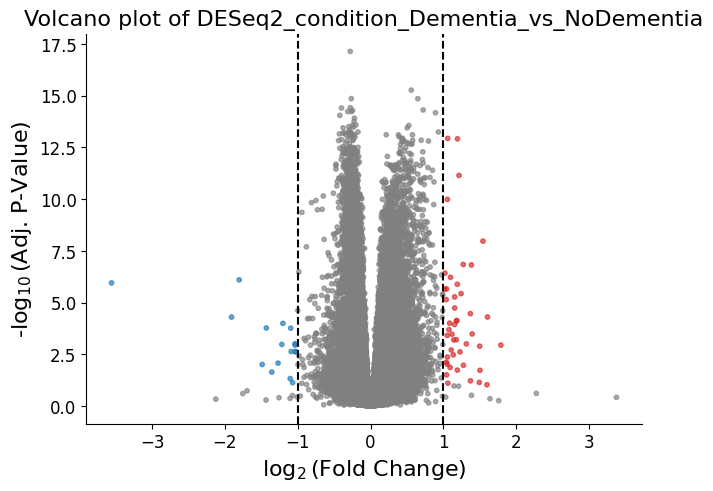

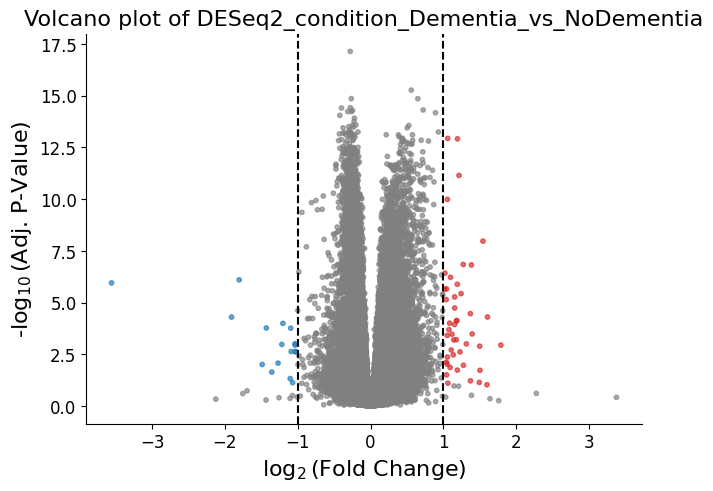

In [23]:
deseq_res_filter.volcano_plot()

In [24]:
deseq_res_filter.filter_significant(0.05)

Filtered 32300 features, leaving 14426 of the original 46726 features. Filtered inplace.


In [25]:
deseq_res_filter.head(5)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
499316280,1105.621802,-0.279198,0.028646,-9.746341,1.912362e-22,7.203104e-18
499334626,238.077979,0.560459,0.060757,9.224672,2.844300e-20,5.356670e-16
499306314,972.449482,-0.263372,0.029112,-9.046731,1.473119e-19,1.387163e-15
499329195,164.742083,0.649798,0.071800,9.050155,1.427649e-19,1.387163e-15
499326558,1897.126165,-0.277358,0.031121,-8.912278,4.999457e-19,3.766191e-15


In [26]:
#normalize to reads per million for limma voom
ct_matrix_filter.normalize_to_rpm()

Normalized 46726 features. Normalized inplace.


In [27]:
ct_matrix_filter.head(5)

,488395315,496100277,496100278,496100279,496100281,496100283,496100284,496100285,496100287,496100288,...,496100661,496100663,496100664,496100665,496100666,496100667,496100669,496100670,496100671,496100672
499304660,1.170283,0.073644,0.000000,0.000000,0.000000,0.000000,0.000000,0.231810,0.350380,0.000000,...,0.700746,0.748213,0.000000,1.022996,0.524180,0.000000,0.000000,0.314293,0.000000,0.000000
499304661,6.924174,14.287020,6.967207,6.182666,6.227801,8.510924,8.772203,6.104324,6.569633,9.531920,...,9.460069,6.869959,7.177183,8.262660,7.141947,9.609795,13.820456,11.078821,7.083001,7.959269
499304664,0.000000,0.000000,0.000000,0.228988,0.000000,0.000000,0.168696,0.154540,0.000000,0.140175,...,0.000000,0.068019,0.000000,0.078692,0.131045,0.132549,0.137517,0.000000,0.066821,0.000000
499304665,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
499304666,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.140175,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.137517,0.000000,0.000000,0.000000


In [28]:
ct_matrix_filter.differential_expression_limma_voom(design_matrix='C:\\Users\\dyeca\\OneDrive\\Documents\\capstone\\aging_dementia_tbi\\data\\interim\\exp_design.csv',comparisons=[('condition','Dementia','NoDementia')],r_installation_folder='C:\Program Files\R\R-4.3.2',output_folder='C:\\Users\\dyeca\\OneDrive\\Documents\\capstone\\aging_dementia_tbi\\data\\interim')

Loading required package: limma



(DESeqFilter('C:/Users/dyeca/AppData/Local/RNAlysis/RNAlysis/Cache/2023_11_10/862d5f8d99528017ad6e390bb029da83f4b6772a/LimmaVoom_condition_Dementia_vs_NoDementia.csv'),)

In [29]:
lv_res=pd.read_csv('C:\\Users\\dyeca\\OneDrive\\Documents\\capstone\\aging_dementia_tbi\\data\\interim\\LimmaVoom_condition_Dementia_vs_NoDementia.csv')
deseq2_res=pd.read_csv('C:\\Users\\dyeca\\OneDrive\\Documents\\capstone\\aging_dementia_tbi\\data\\interim\\DESeq2_condition_Dementia_vs_NoDementia.csv')


In [30]:
deseq2_res.head()

,Unnamed: 0,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,499316280,1105.621802,-0.279198,0.028646,-9.746341,1.912362e-22,7.203104e-18
1,499334626,238.077979,0.560459,0.060757,9.224672,2.844300e-20,5.356670e-16
2,499306314,972.449482,-0.263372,0.029112,-9.046731,1.473119e-19,1.387163e-15
3,499329195,164.742083,0.649798,0.071800,9.050155,1.427649e-19,1.387163e-15
4,499326558,1897.126165,-0.277358,0.031121,-8.912278,4.999457e-19,3.766191e-15


In [31]:
pval_cutoff=.05
lfc_cutoff=0.5

In [32]:
print('Significant limma voom results: {}'.format(len(lv_res[((lv_res['adj.P.Val']<pval_cutoff)&(abs(lv_res['logFC'])>lfc_cutoff))])))
print('Significant DESeq2 results: {}'.format(len(deseq2_res[(deseq2_res['padj']<pval_cutoff)&(abs(deseq2_res['log2FoldChange'])>lfc_cutoff)])))
print('Overlap significant results: {}'.format(len(set(deseq2_res[(deseq2_res['padj']<pval_cutoff)&(abs(deseq2_res['log2FoldChange'])>lfc_cutoff)]['Unnamed: 0']).intersection(set(lv_res[((lv_res['adj.P.Val']<pval_cutoff)&(abs(lv_res['logFC'])>lfc_cutoff))]['Unnamed: 0'])))))


Significant limma voom results: 209
Significant DESeq2 results: 1032
Overlap significant results: 152


Limma voom enrichment analysis

In [33]:
lv_filtered=lv_res[((lv_res['adj.P.Val']<pval_cutoff)&(abs(lv_res['logFC'])>lfc_cutoff))]

In [34]:
lv_genes_merged=lv_filtered.merge(genes,left_on='Unnamed: 0',right_on='gene_id')

In [35]:
lv_results_enr = enrichment.FeatureSet(set(lv_genes_merged['gene_symbol']), 'LV_results')


In [36]:
lv_genes_merged

,Unnamed: 0,logFC,AveExpr,t,P.Value,adj.P.Val,B,gene_id,chromosome,gene_entrez_id,gene_symbol,gene_name
0,499329195,0.679696,3.567393,9.519351,2.181688e-19,1.019415e-14,31.807963,499329195,9,85301,COL27A1,"collagen, type XXVII, alpha 1"
1,499334295,0.579394,4.048218,9.083925,6.085013e-18,1.050535e-13,28.461820,499334295,11,283149,BCL9L,B-cell CLL/lymphoma 9-like
2,499334626,0.533165,4.134552,8.980654,1.321299e-17,1.360105e-13,27.686114,499334626,12,6539,SLC6A12,solute carrier family 6 (neurotransmitter tran...
3,499336992,0.539525,4.933453,8.759231,6.836887e-17,4.563720e-13,26.008864,499336992,12,5426,POLE,"polymerase (DNA directed), epsilon, catalytic ..."
4,499350441,0.553100,2.324766,8.457587,6.151042e-16,1.687572e-12,24.092081,499350441,20,140876,FAM65C,"family with sequence similarity 65, member C"
...,...,...,...,...,...,...,...,...,...,...,...,...
204,499342777,0.603866,2.169256,3.146445,1.784622e-03,9.328588e-03,-3.801930,499342777,16,100526830,SLX1A-SULT1A3,SLX1A-SULT1A3 readthrough (NMD candidate)
205,499342494,-0.530601,1.008210,-3.028180,2.630357e-03,1.292444e-02,-3.961069,499342494,16,101059953,NPIPA8,nuclear pore complex interacting protein famil...
206,499342503,-0.541175,0.832282,-2.982885,3.041992e-03,1.462046e-02,-4.062067,499342503,16,102723728,LOC102723728,nodal modulator 3-like
207,499307237,-0.599434,7.418963,-2.926599,3.635447e-03,1.701591e-02,-4.776559,499307237,1,26864,RNVU1-7,"RNA, variant U1 small nuclear 7"


19559 background genes are used.


Enrichment will be computed on the remaining 97 genes.


Calculating enrichment for 22169 GO terms using the 'elim' method:   0%|          | [00:00<?, ?it/s]

[ProgressParallel(n_jobs=-2)]: Using backend LokyBackend with 11 concurrent workers.
[ProgressParallel(n_jobs=-2)]: Done   3 out of   3 | elapsed:   37.4s finished


ValueError: Image size of 1050x886952 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1050x886952 with 2 Axes>

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

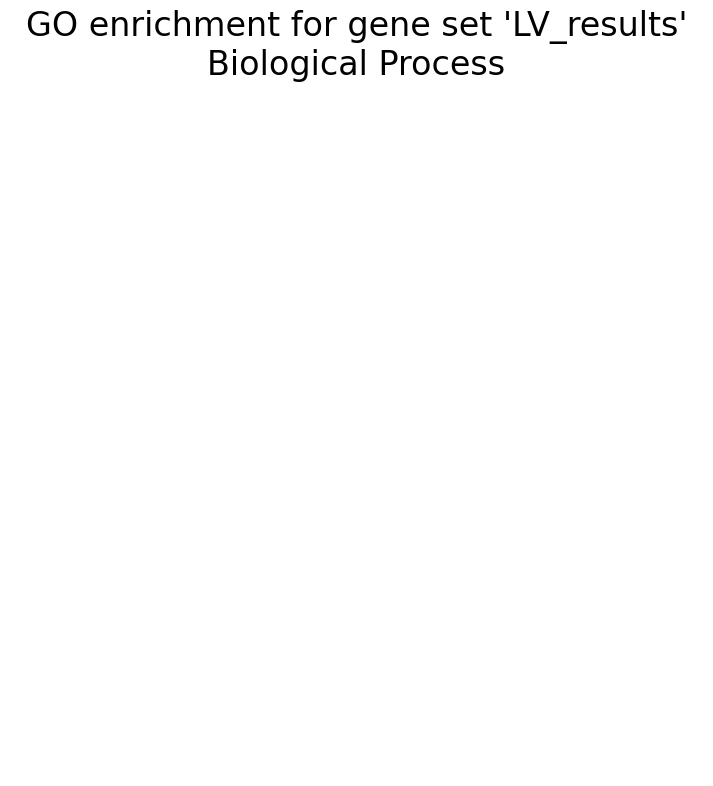

In [38]:
lv_results_enr.go_enrichment(organism='9606',gene_id_type='Gene Name')


Fetching KEGG annotations for organism 'Homo sapiens' (taxon ID:9606):   0%|          | 0/356 [00:00<?, ? anno…

Found annotations for 7083 genes.
Mapping 7083 entries from 'KEGG' to 'Gene Name'...
Mapping 7083 entries from 'KEGG' to 'UniProtKB_to'...
Retrying in 3s
Retrying in 3s
Fetched: 500 / 9454
Fetched: 1000 / 9454
Fetched: 1500 / 9454
Fetched: 2000 / 9454
Fetched: 2500 / 9454
Fetched: 3000 / 9454
Fetched: 3500 / 9454
Fetched: 4000 / 9454
Fetched: 4500 / 9454
Fetched: 5000 / 9454
Fetched: 5500 / 9454
Fetched: 6000 / 9454
Fetched: 6500 / 9454
Fetched: 7000 / 9454
Fetched: 7500 / 9454
Fetched: 8000 / 9454
Fetched: 8500 / 9454
Fetched: 9000 / 9454
Fetched: 9454 / 9454


When using the Copy-on-Write mode, such chained assignment never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy.

Try using '.loc[row_indexer, col_indexer] = value' instead, to perform the assignment in a single step.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Mapping 6979 entries from 'UniProtKB_from' to 'Gene Name'...
Retrying in 3s
Retrying in 3s
Retrying in 3s
Retrying in 3s
Retrying in 3s
Retrying in 3s
Fetched: 500 / 6940
Fetched: 1000 / 6940
Fetched: 1500 / 6940
Fetched: 2000 / 6940
Fetched: 2500 / 6940
Fetched: 3000 / 6940
Fetched: 3500 / 6940
Fetched: 4000 / 6940
Fetched: 4500 / 6940
Fetched: 5000 / 6940
Fetched: 5500 / 6940
Fetched: 6000 / 6940
Fetched: 6500 / 6940
Fetched: 6940 / 6940
Retrying in 3s
Fetched: 500 / 3127
Fetched: 1000 / 3127
Fetched: 1500 / 3127
Fetched: 2000 / 3127
Fetched: 2500 / 3127
Fetched: 3000 / 3127
Fetched: 3127 / 3127


Generating Gene Ontology Referene Table:   0%|          | [00:00<?]

6885 background genes are used.


Enrichment will be computed on the remaining 37 genes.


Calculating enrichment:   0%|          | [00:00<?, ?attribute/s]

[ProgressParallel(n_jobs=-2)]: Using backend LokyBackend with 11 concurrent workers.
[ProgressParallel(n_jobs=-2)]: Done 288 out of 288 | elapsed:   43.1s finished


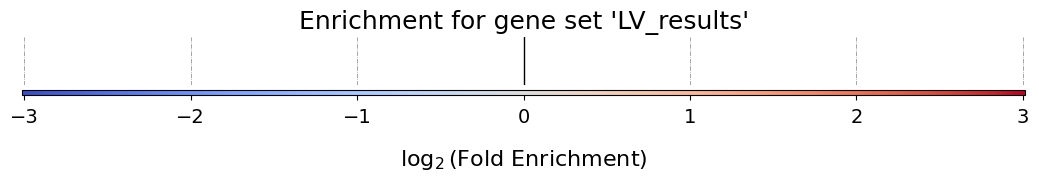

,name,samples,obs,exp,log2_fold_enrichment,pval,padj,significant
KEGG ID,,,,,,,,


In [39]:
lv_results_enr.kegg_enrichment(organism='9606',gene_id_type='Gene Name')


In [ ]:
#maybe needs to be normalized?
#silhouette_clusters = ct_matrix_filter.split_kmeans(n_clusters='silhouette')
